<a href="https://colab.research.google.com/github/Vanitha-Jain/capstone/blob/Data-Collection/Exploratory_analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
! wget https://repo.anaconda.com/miniconda/Miniconda3-py37_4.8.2-Linux-x86_64.sh
! chmod +x Miniconda3-py37_4.8.2-Linux-x86_64.sh
! bash ./Miniconda3-py37_4.8.2-Linux-x86_64.sh -b -f -p /usr/local
! conda install -c rdkit rdkit -y
import sys
sys.path.append('/usr/local/lib/python3.7/site-packages/')

--2025-03-04 05:37:19--  https://repo.anaconda.com/miniconda/Miniconda3-py37_4.8.2-Linux-x86_64.sh
Resolving repo.anaconda.com (repo.anaconda.com)... 104.16.191.158, 104.16.32.241, 2606:4700::6810:20f1, ...
Connecting to repo.anaconda.com (repo.anaconda.com)|104.16.191.158|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 85055499 (81M) [application/x-sh]
Saving to: ‘Miniconda3-py37_4.8.2-Linux-x86_64.sh’

Miniconda3-py37_4.8 100%[===================>]  81.12M  71.9MB/s    in 1.1s    

2025-03-04 05:37:20 (71.9 MB/s) - ‘Miniconda3-py37_4.8.2-Linux-x86_64.sh’ saved [85055499/85055499]

PREFIX=/usr/local
Unpacking payload ...
Solving environment: / - done

## Package Plan ##

  environment location: /usr/local

  added / updated specs:
    - _libgcc_mutex==0.1=main
    - asn1crypto==1.3.0=py37_0
    - ca-certificates==2020.1.1=0
    - certifi==2019.11.28=py37_0
    - cffi==1.14.0=py37h2e261b9_0
    - chardet==3.0.4=py37_1003
    - conda-package-handling==1.6.0

In [ ]:
import pandas as pd

In [ ]:
df = pd.read_csv('/content/bioactivity_preprocessed_data.csv')

In [ ]:
!pip install rdkit-pypi
import sys


     |████████████████████████████████| 29.2 MB 69.0 MB/s 


In [ ]:
import pandas as pd
import numpy as np
from rdkit import Chem
from rdkit.Chem import Descriptors, Lipinski

In [ ]:
def lipinski(smiles, verbose=False):

    moldata= []
    invalid_smiles_count = 0 # Initialize a counter for invalid SMILES strings
    for elem in smiles:
        if isinstance(elem, str): # Check if elem is a string
            mol=Chem.MolFromSmiles(elem)
            if mol is not None: # Check if mol object was successfully created
               moldata.append(mol)
            else:
              invalid_smiles_count +=1
              print(f"Invalid SMILES string: {elem}")
        else:
            invalid_smiles_count += 1
            print(f"Invalid input type. Expected string, got: {type(elem)}, value:{elem}")
    if invalid_smiles_count > 0:
        print(f"Number of invalid SMILES strings: {invalid_smiles_count}")
    baseData= np.arange(1,1)
    i=0
    for mol in moldata:

        desc_MolWt = Descriptors.MolWt(mol)
        desc_MolLogP = Descriptors.MolLogP(mol)
        desc_NumHDonors = Lipinski.NumHDonors(mol)
        desc_NumHAcceptors = Lipinski.NumHAcceptors(mol)

        row = np.array([desc_MolWt,
                        desc_MolLogP,
                        desc_NumHDonors,
                        desc_NumHAcceptors])

        if(i==0):
            baseData=row
        else:
            baseData=np.vstack([baseData, row])
        i=i+1

    columnNames=["MW","LogP","NumHDonors","NumHAcceptors"]
    descriptors = pd.DataFrame(data=baseData,columns=columnNames)

    return descriptors

In [ ]:
df_lipinski = lipinski(df.canonical_smiles)

Invalid input type. Expected string, got: <class 'float'>, value:nan
Number of invalid SMILES strings: 1


In [ ]:
df_lipinski

,MW,LogP,NumHDonors,NumHAcceptors
0,415.492,4.42512,2.0,5.0
1,451.547,3.62602,2.0,6.0
2,421.927,5.18434,2.0,4.0
3,407.900,4.87592,2.0,4.0
4,373.455,4.22252,2.0,4.0
...,...,...,...,...
1809,255.320,4.38650,0.0,1.0
1810,307.396,6.07220,0.0,1.0
1811,228.247,2.97380,3.0,3.0
1812,130.078,-0.79770,2.0,2.0


In [ ]:
df

,molecule_chembl_id,canonical_smiles,bioactivity_class,standard_value
0,CHEMBL167155,CC(=O)c1ccc(-c2cc(NS(=O)(=O)c3ccccc3C)c(C(=O)O...,inactive,12000.0
1,CHEMBL166740,Cc1ccccc1S(=O)(=O)Nc1cc(-c2ccc(S(C)(=O)=O)cc2)...,inactive,100000.0
2,CHEMBL165038,Cc1cc(S(=O)(=O)Nc2cc(-c3ccccc3)sc2C(=O)O)c(C)c...,inactive,14000.0
3,CHEMBL435857,Cc1cc(Cl)ccc1S(=O)(=O)Nc1cc(-c2ccccc2)sc1C(=O)O,inactive,13000.0
4,CHEMBL352783,Cc1cccc(S(=O)(=O)Nc2cc(-c3ccccc3)sc2C(=O)O)c1,inactive,100000.0
...,...,...,...,...
1810,CHEMBL5405698,C#Cc1ccccc1/C=C/c1nccc2ccccc12,inactive,24840.0
1811,CHEMBL5416562,C(=C/c1nccc2ccccc12)\c1ccc(-c2ccccc2)cc1,inactive,40000.0
1812,CHEMBL165,Oc1ccc(/C=C/c2cc(O)cc(O)c2)cc1,inactive,40000.0
1813,CHEMBL185,O=c1[nH]cc(F)c(=O)[nH]1,intermediate,8980.0


In [ ]:
df_combined = pd.concat([df,df_lipinski], axis=1)

In [ ]:
df_combined

,molecule_chembl_id,canonical_smiles,bioactivity_class,standard_value,MW,LogP,NumHDonors,NumHAcceptors
0,CHEMBL167155,CC(=O)c1ccc(-c2cc(NS(=O)(=O)c3ccccc3C)c(C(=O)O...,inactive,12000.0,415.492,4.42512,2.0,5.0
1,CHEMBL166740,Cc1ccccc1S(=O)(=O)Nc1cc(-c2ccc(S(C)(=O)=O)cc2)...,inactive,100000.0,451.547,3.62602,2.0,6.0
2,CHEMBL165038,Cc1cc(S(=O)(=O)Nc2cc(-c3ccccc3)sc2C(=O)O)c(C)c...,inactive,14000.0,421.927,5.18434,2.0,4.0
3,CHEMBL435857,Cc1cc(Cl)ccc1S(=O)(=O)Nc1cc(-c2ccccc2)sc1C(=O)O,inactive,13000.0,407.900,4.87592,2.0,4.0
4,CHEMBL352783,Cc1cccc(S(=O)(=O)Nc2cc(-c3ccccc3)sc2C(=O)O)c1,inactive,100000.0,373.455,4.22252,2.0,4.0
...,...,...,...,...,...,...,...,...
1810,CHEMBL5405698,C#Cc1ccccc1/C=C/c1nccc2ccccc12,inactive,24840.0,307.396,6.07220,0.0,1.0
1811,CHEMBL5416562,C(=C/c1nccc2ccccc12)\c1ccc(-c2ccccc2)cc1,inactive,40000.0,228.247,2.97380,3.0,3.0
1812,CHEMBL165,Oc1ccc(/C=C/c2cc(O)cc(O)c2)cc1,inactive,40000.0,130.078,-0.79770,2.0,2.0
1813,CHEMBL185,O=c1[nH]cc(F)c(=O)[nH]1,intermediate,8980.0,464.831,5.54970,3.0,4.0


In [ ]:
import numpy as np

def pIC50(input):
    pIC50 = []

    for i in input['standard_value_norm']:
        molar = i*(10**-9) # Converts nM to M
        pIC50.append(-np.log10(molar))

    input['pIC50'] = pIC50
    x = input.drop('standard_value_norm', axis=1)
    return x

In [ ]:
df_combined.standard_value.describe()

,standard_value
count,1.815000e+03
mean,4.093859e+04
std,4.252663e+05
min,2.000000e-02
25%,1.000000e+03
50%,6.200000e+03
75%,2.000000e+04
max,1.550116e+07


In [ ]:
-np.log10( (10**-9)* 100000000 )

1.0

In [ ]:
-np.log10( (10**-9)* 10000000000 )

-1.0

In [ ]:
def norm_value(input):
    norm = []

    for i in input['standard_value']:
        if i > 100000000:
          i = 100000000
        norm.append(i)

    input['standard_value_norm'] = norm
    x = input.drop('standard_value', axis=1)
    return x

In [ ]:
df_norm = norm_value(df_combined)
df_norm

,molecule_chembl_id,canonical_smiles,bioactivity_class,MW,LogP,NumHDonors,NumHAcceptors,standard_value_norm
0,CHEMBL167155,CC(=O)c1ccc(-c2cc(NS(=O)(=O)c3ccccc3C)c(C(=O)O...,inactive,415.492,4.42512,2.0,5.0,12000.0
1,CHEMBL166740,Cc1ccccc1S(=O)(=O)Nc1cc(-c2ccc(S(C)(=O)=O)cc2)...,inactive,451.547,3.62602,2.0,6.0,100000.0
2,CHEMBL165038,Cc1cc(S(=O)(=O)Nc2cc(-c3ccccc3)sc2C(=O)O)c(C)c...,inactive,421.927,5.18434,2.0,4.0,14000.0
3,CHEMBL435857,Cc1cc(Cl)ccc1S(=O)(=O)Nc1cc(-c2ccccc2)sc1C(=O)O,inactive,407.900,4.87592,2.0,4.0,13000.0
4,CHEMBL352783,Cc1cccc(S(=O)(=O)Nc2cc(-c3ccccc3)sc2C(=O)O)c1,inactive,373.455,4.22252,2.0,4.0,100000.0
...,...,...,...,...,...,...,...,...
1810,CHEMBL5405698,C#Cc1ccccc1/C=C/c1nccc2ccccc12,inactive,307.396,6.07220,0.0,1.0,24840.0
1811,CHEMBL5416562,C(=C/c1nccc2ccccc12)\c1ccc(-c2ccccc2)cc1,inactive,228.247,2.97380,3.0,3.0,40000.0
1812,CHEMBL165,Oc1ccc(/C=C/c2cc(O)cc(O)c2)cc1,inactive,130.078,-0.79770,2.0,2.0,40000.0
1813,CHEMBL185,O=c1[nH]cc(F)c(=O)[nH]1,intermediate,464.831,5.54970,3.0,4.0,8980.0


In [ ]:
df_norm.standard_value_norm.describe()

,standard_value_norm
count,1.815000e+03
mean,4.093859e+04
std,4.252663e+05
min,2.000000e-02
25%,1.000000e+03
50%,6.200000e+03
75%,2.000000e+04
max,1.550116e+07


In [ ]:
df_final = pIC50(df_norm)
df_final

,molecule_chembl_id,canonical_smiles,bioactivity_class,MW,LogP,NumHDonors,NumHAcceptors,pIC50
0,CHEMBL167155,CC(=O)c1ccc(-c2cc(NS(=O)(=O)c3ccccc3C)c(C(=O)O...,inactive,415.492,4.42512,2.0,5.0,4.920819
1,CHEMBL166740,Cc1ccccc1S(=O)(=O)Nc1cc(-c2ccc(S(C)(=O)=O)cc2)...,inactive,451.547,3.62602,2.0,6.0,4.000000
2,CHEMBL165038,Cc1cc(S(=O)(=O)Nc2cc(-c3ccccc3)sc2C(=O)O)c(C)c...,inactive,421.927,5.18434,2.0,4.0,4.853872
3,CHEMBL435857,Cc1cc(Cl)ccc1S(=O)(=O)Nc1cc(-c2ccccc2)sc1C(=O)O,inactive,407.900,4.87592,2.0,4.0,4.886057
4,CHEMBL352783,Cc1cccc(S(=O)(=O)Nc2cc(-c3ccccc3)sc2C(=O)O)c1,inactive,373.455,4.22252,2.0,4.0,4.000000
...,...,...,...,...,...,...,...,...
1810,CHEMBL5405698,C#Cc1ccccc1/C=C/c1nccc2ccccc12,inactive,307.396,6.07220,0.0,1.0,4.604848
1811,CHEMBL5416562,C(=C/c1nccc2ccccc12)\c1ccc(-c2ccccc2)cc1,inactive,228.247,2.97380,3.0,3.0,4.397940
1812,CHEMBL165,Oc1ccc(/C=C/c2cc(O)cc(O)c2)cc1,inactive,130.078,-0.79770,2.0,2.0,4.397940
1813,CHEMBL185,O=c1[nH]cc(F)c(=O)[nH]1,intermediate,464.831,5.54970,3.0,4.0,5.046724


In [ ]:
df_final.pIC50.describe()

,pIC50
count,1815.000000
mean,5.462892
std,1.126878
min,1.809636
25%,4.698970
50%,5.207608
75%,6.000000
max,10.698970


In [ ]:
df_2class = df_final[df_final.bioactivity_class != 'intermediate']
df_2class

,molecule_chembl_id,canonical_smiles,bioactivity_class,MW,LogP,NumHDonors,NumHAcceptors,pIC50
0,CHEMBL167155,CC(=O)c1ccc(-c2cc(NS(=O)(=O)c3ccccc3C)c(C(=O)O...,inactive,415.492,4.42512,2.0,5.0,4.920819
1,CHEMBL166740,Cc1ccccc1S(=O)(=O)Nc1cc(-c2ccc(S(C)(=O)=O)cc2)...,inactive,451.547,3.62602,2.0,6.0,4.000000
2,CHEMBL165038,Cc1cc(S(=O)(=O)Nc2cc(-c3ccccc3)sc2C(=O)O)c(C)c...,inactive,421.927,5.18434,2.0,4.0,4.853872
3,CHEMBL435857,Cc1cc(Cl)ccc1S(=O)(=O)Nc1cc(-c2ccccc2)sc1C(=O)O,inactive,407.900,4.87592,2.0,4.0,4.886057
4,CHEMBL352783,Cc1cccc(S(=O)(=O)Nc2cc(-c3ccccc3)sc2C(=O)O)c1,inactive,373.455,4.22252,2.0,4.0,4.000000
...,...,...,...,...,...,...,...,...
1808,CHEMBL5429863,Nc1ccccc1/C=C/c1nccc2ccccc12,inactive,255.320,4.38650,0.0,1.0,4.397940
1809,CHEMBL5436920,C#Cc1ccc(/C=C/c2nccc3ccccc23)cc1,inactive,255.320,4.38650,0.0,1.0,4.890084
1810,CHEMBL5405698,C#Cc1ccccc1/C=C/c1nccc2ccccc12,inactive,307.396,6.07220,0.0,1.0,4.604848
1811,CHEMBL5416562,C(=C/c1nccc2ccccc12)\c1ccc(-c2ccccc2)cc1,inactive,228.247,2.97380,3.0,3.0,4.397940


In [ ]:
output_file = "filtered_bioactivity_data.csv"
df_2class.to_csv(output_file, index=False)

print(f"Data saved to {output_file}")

Data saved to filtered_bioactivity_data.csv


In [ ]:
import seaborn as sns
sns.set(style='ticks')
import matplotlib.pyplot as plt

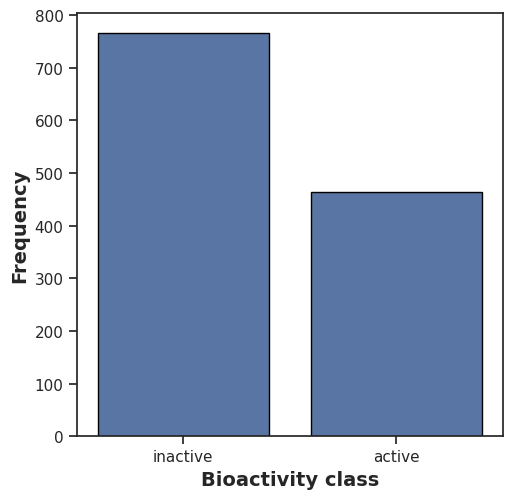

In [ ]:
plt.figure(figsize=(5.5, 5.5))

sns.countplot(x='bioactivity_class', data=df_2class, edgecolor='black')

plt.xlabel('Bioactivity class', fontsize=14, fontweight='bold')
plt.ylabel('Frequency', fontsize=14, fontweight='bold')

plt.savefig('plot_bioactivity_class.pdf')

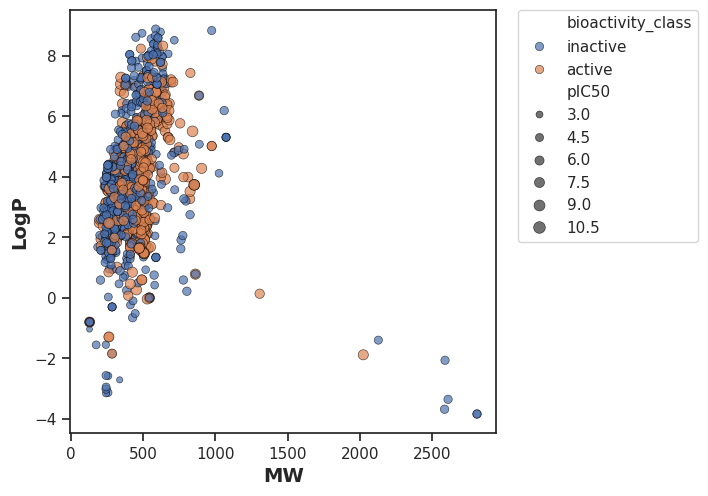

In [ ]:
plt.figure(figsize=(5.5, 5.5))

sns.scatterplot(x='MW', y='LogP', data=df_2class, hue='bioactivity_class', size='pIC50', edgecolor='black', alpha=0.7)

plt.xlabel('MW', fontsize=14, fontweight='bold')
plt.ylabel('LogP', fontsize=14, fontweight='bold')
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0)
plt.savefig('plot_MW_vs_LogP.pdf')

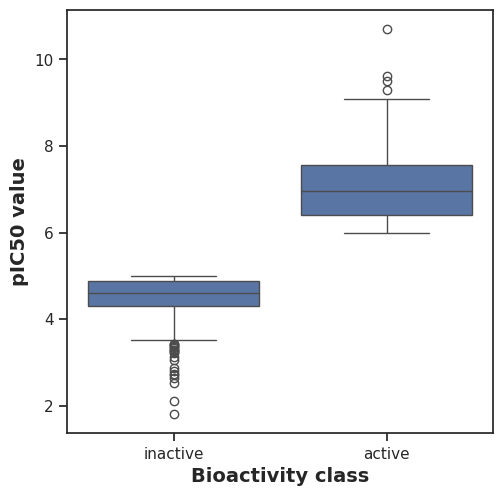

In [ ]:
plt.figure(figsize=(5.5, 5.5))

sns.boxplot(x = 'bioactivity_class', y = 'pIC50', data = df_2class)

plt.xlabel('Bioactivity class', fontsize=14, fontweight='bold')
plt.ylabel('pIC50 value', fontsize=14, fontweight='bold')

plt.savefig('plot_ic50.pdf')

In [ ]:
def mannwhitney(descriptor, verbose=False):
  # https://machinelearningmastery.com/nonparametric-statistical-significance-tests-in-python/
  from numpy.random import seed
  from numpy.random import randn
  from scipy.stats import mannwhitneyu

# seed the random number generator
  seed(1)

# actives and inactives
  selection = [descriptor, 'bioactivity_class']
  df = df_2class[selection]
  active = df[df.bioactivity_class == 'active']
  active = active[descriptor]

  selection = [descriptor, 'bioactivity_class']
  df = df_2class[selection]
  inactive = df[df.bioactivity_class == 'inactive']
  inactive = inactive[descriptor]

# compare samples
  stat, p = mannwhitneyu(active, inactive)
  #print('Statistics=%.3f, p=%.3f' % (stat, p))

# interpret
  alpha = 0.05
  if p > alpha:
    interpretation = 'Same distribution (fail to reject H0)'
  else:
    interpretation = 'Different distribution (reject H0)'

  results = pd.DataFrame({'Descriptor':descriptor,
                          'Statistics':stat,
                          'p':p,
                          'alpha':alpha,
                          'Interpretation':interpretation}, index=[0])
  filename = 'mannwhitneyu_' + descriptor + '.csv'
  results.to_csv(filename)

  return results

In [ ]:
mannwhitney('pIC50')

,Descriptor,Statistics,p,alpha,Interpretation
0,pIC50,355424.0,1.155358e-190,0.05,Different distribution (reject H0)


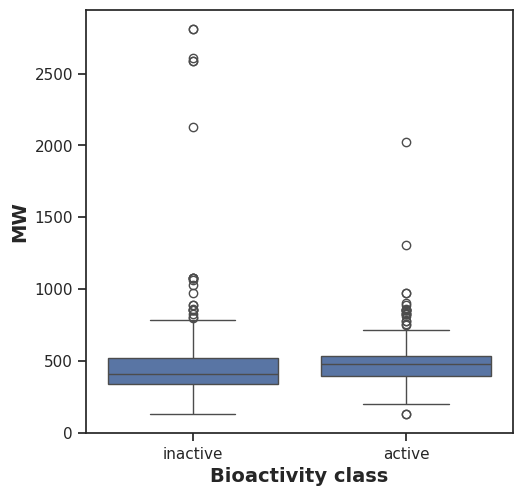

In [ ]:
plt.figure(figsize=(5.5, 5.5))

sns.boxplot(x = 'bioactivity_class', y = 'MW', data = df_2class)

plt.xlabel('Bioactivity class', fontsize=14, fontweight='bold')
plt.ylabel('MW', fontsize=14, fontweight='bold')

plt.savefig('plot_MW.pdf')

In [ ]:
mannwhitney('MW')

,Descriptor,Statistics,p,alpha,Interpretation
0,MW,214981.5,6.736777e-10,0.05,Different distribution (reject H0)


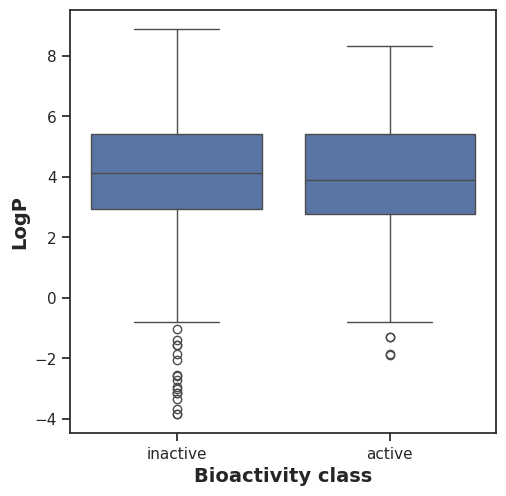

In [ ]:
plt.figure(figsize=(5.5, 5.5))

sns.boxplot(x = 'bioactivity_class', y = 'LogP', data = df_2class)

plt.xlabel('Bioactivity class', fontsize=14, fontweight='bold')
plt.ylabel('LogP', fontsize=14, fontweight='bold')

plt.savefig('plot_LogP.pdf')

In [ ]:
mannwhitney('LogP')

,Descriptor,Statistics,p,alpha,Interpretation
0,LogP,171016.0,0.267496,0.05,Same distribution (fail to reject H0)


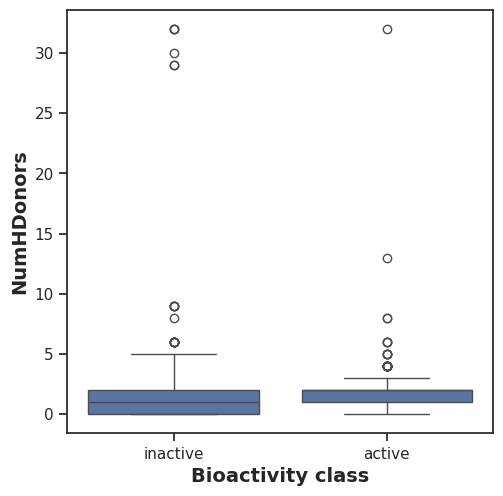

In [ ]:
plt.figure(figsize=(5.5, 5.5))

sns.boxplot(x = 'bioactivity_class', y = 'NumHDonors', data = df_2class)

plt.xlabel('Bioactivity class', fontsize=14, fontweight='bold')
plt.ylabel('NumHDonors', fontsize=14, fontweight='bold')

plt.savefig('plot_NumHDonors.pdf')

In [ ]:
mannwhitney('NumHDonors')

,Descriptor,Statistics,p,alpha,Interpretation
0,NumHDonors,206374.0,9.997023e-07,0.05,Different distribution (reject H0)


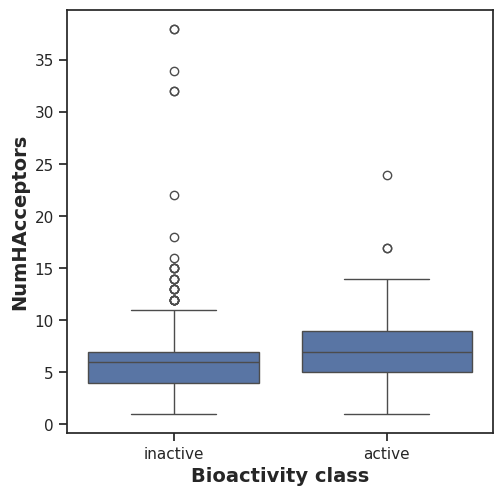

In [ ]:
plt.figure(figsize=(5.5, 5.5))

sns.boxplot(x = 'bioactivity_class', y = 'NumHAcceptors', data = df_2class)

plt.xlabel('Bioactivity class', fontsize=14, fontweight='bold')
plt.ylabel('NumHAcceptors', fontsize=14, fontweight='bold')

plt.savefig('plot_NumHAcceptors.pdf')

In [ ]:
mannwhitney('NumHAcceptors')

,Descriptor,Statistics,p,alpha,Interpretation
0,NumHAcceptors,221050.0,4.531553e-13,0.05,Different distribution (reject H0)


In [ ]:
! zip -r results.zip . -i *.csv *.pdf

  adding: plot_NumHAcceptors.pdf (deflated 38%)
  adding: mannwhitneyu_NumHAcceptors.csv (deflated 10%)
  adding: plot_ic50.pdf (deflated 37%)
  adding: mannwhitneyu_MW.csv (deflated 7%)
  adding: mannwhitneyu_NumHDonors.csv (deflated 11%)
  adding: bioactivity_preprocessed_data.csv (deflated 82%)
  adding: plot_LogP.pdf (deflated 38%)
  adding: plot_MW.pdf (deflated 40%)
  adding: mannwhitneyu_LogP.csv (deflated 8%)
  adding: mannwhitneyu_pIC50.csv (deflated 12%)
  adding: plot_MW_vs_LogP.pdf (deflated 3%)
  adding: plot_bioactivity_class.pdf (deflated 37%)
  adding: plot_NumHDonors.pdf (deflated 38%)
